# Visualization of Best Clustering Algorithm

According to our evaluation of the three implemented clustering algorithms DBSCAN, Affinity Propagation and BIRCH, we want to visualize the best clustering algorithm regarding our Spotify dataset.

In [133]:
# Modify sys.path to allow imports of own modules
import os
import sys

BASE_DIR = os.path.join(os.path.abspath(""), "..")
sys.path.insert(0, BASE_DIR)

from clustering import dbscan
from clustering import affinity_propagation
from clustering import birch

from data.datasource import load_X_y

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [135]:
# Load dataset
X, y, df = load_X_y(os.path.join(BASE_DIR, "data", "SpotifyFeatures.csv"), sample_size=500)

np.random.seed(42)

n_samples, n_dims = X.shape

## Visualization of Ground Truth Clustering

In [136]:
# Dimensional Reduction with T-SNE to 2D
tsne = TSNE(n_components=2, perplexity=60) # larger perplexity for larger datasets
X_tsne = tsne.fit_transform(X)

/tmp/ipykernel_109025/2283395541.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', num_clusters)


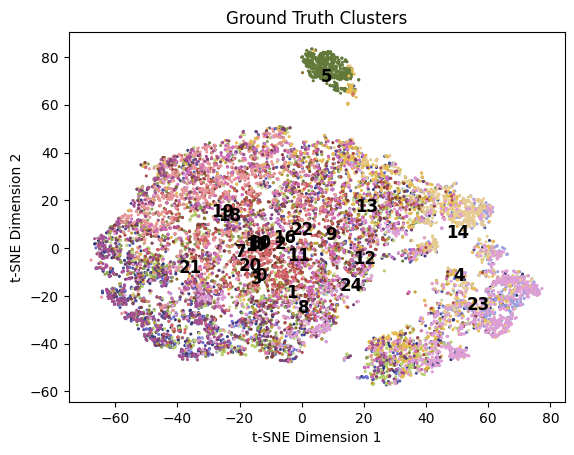

In [137]:
# Assign a color to each cluster
unique_labels = np.unique(y)
num_clusters = len(unique_labels)
colors = plt.cm.get_cmap('tab20b', num_clusters)

# Plot t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, cmap=colors, s=5, edgecolor='none')

# Plot genre labels    
for label in unique_labels:
    indices = np.where(y == label)[0]  # Get the indices of data points in the current cluster
    cluster_points = X_tsne[indices]  # Get the data points for the current cluster
    cluster_center = np.mean(cluster_points, axis=0)  # Compute the centroid of the cluster
    plt.text(cluster_center[0], cluster_center[1], str(label), fontsize=12, weight='bold', color='black',
             horizontalalignment='center', verticalalignment='center')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Ground Truth Clusters')
plt.show()

# Choosen Clustering Algorithm

In [138]:
# Choose algorithm and config
# e.g. DBSCAN
eps = 0.3243739010428709
myclustering = dbscan.dbscan(X, epsilon=eps, min_points=2 * n_dims)

# Assign clustercenter_indices and labels
# clustercenter_indices: array([   0, 1528, 2500])
# labels: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)
clustercenter_indices, labels = myclustering

/tmp/ipykernel_109025/1548721760.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', num_clusters)


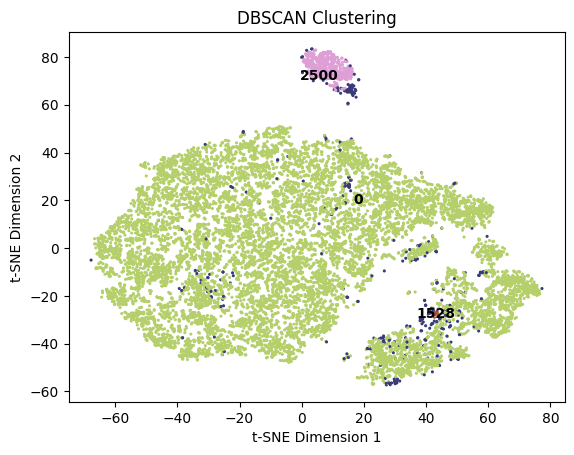

In [142]:
# Dimensional Reduction with T-SNE to 2D already done

# Assign a color to each cluster
unique_labels = np.unique(labels)
num_clusters = len(unique_labels)
colors = plt.cm.get_cmap('tab20b', num_clusters)

# Plot t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=labels, cmap=colors, s=5, edgecolor='none')

# Plot the core sample indices as labels
if 'clustercenter_indices' in locals():
    for index in clustercenter_indices:
        plt.text(X_tsne[index, 0], X_tsne[index, 1], str(index), color='black', weight='bold',
                 horizontalalignment='center', verticalalignment='center')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Best Clustering Algorithm')
plt.show()

## Plot Outliers separately

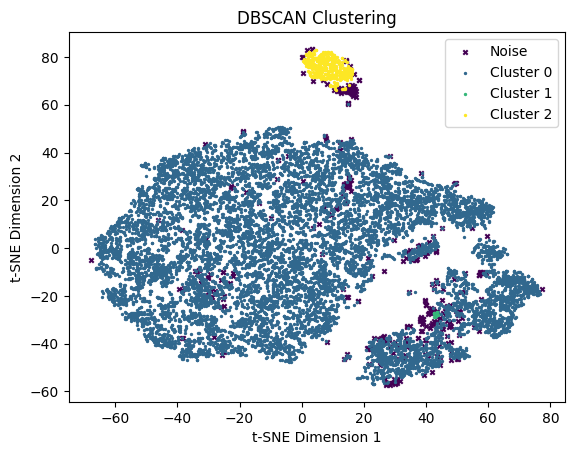

In [141]:
# Assign a color to each cluster
unique_labels = np.unique(labels)
num_clusters = len(unique_labels)
colors = [plt.cm.viridis(label) for label in np.linspace(0, 1, len(unique_labels))]

for color, label in zip(colors, unique_labels):
    if label == -1:
        # Plot the points classified as noise (cluster label -1)
        xy = X_tsne[labels == label]
        plt.scatter(xy[:, 0], xy[:, 1], s=10, c=[color], marker='x', label='Noise')
    else:
        # Plot the points belonging to each cluster
        xy = X_tsne[labels == label]
        plt.scatter(xy[:, 0], xy[:, 1], s=2, c=[color], marker='o', label=f'Cluster {label}')

plt.legend()
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
